## Part 1a - Real life examples (2 points)

Un confounder es una variable que afecta tanto al tratamiento como al resultado y si no la controlas, mezcla el efecto verdadero con un back-door path (como la metáfora del perro que se escapa).
Un collider es una variable que es efecto común  de dos variables; si la condicionas o filtras por ella, abres un sesgo y aparece una asociación espuria  entre sus causas.
Un mediator es una variable que está en medio de la ruta causa y transporta parte del efecto; controlarlo entrega el efecto directo  pero corta el efecto indirecto , mientras que no controlarlo da el efecto total.

1) Confounder — Retornos a la educación (*ability bias*)
- **X (tratamiento):** Años de educación  
- **Y (resultado):** Salario/ingresos  
- **Z (confusor):** Habilidad/motivación/background familiar (empuja a estudiar y a ganar más)  
- **Idea:** Si no controlas **Z**, sobreestimas el efecto de **X** sobre **Y** (back-door abierto).  



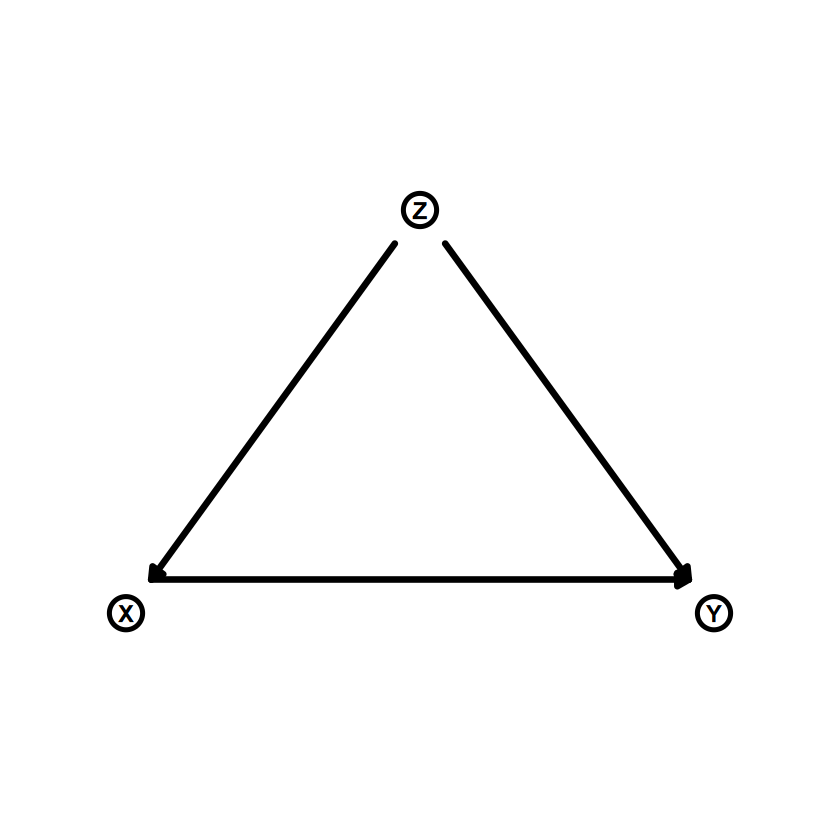

In [8]:
# Confounder DAG (Z -> X, Z -> Y, X -> Y) en el mismo estilo que tu código

# install.packages(c("ggplot2", "grid"))  # si lo necesitas
library(ggplot2)
library(grid)

# posiciones de los nodos (mismo layout que usaste)
nodes <- data.frame(
  x   = c(1.5, 5.0, 8.5),   # X, Z, Y en el eje x
  y   = c(1.2, 6.0, 1.2),   # X, Z, Y en el eje y
  lab = c("X",  "Z",  "Y")
)

# flechas con pequeños offsets para no meterse en los círculos
# Z->X, Z->Y, X->Y
seg <- data.frame(
  x    = c(4.7, 5.3, 1.8),  # puntos de inicio (cerca del nodo origen)
  y    = c(5.6, 5.6, 1.6),
  xend = c(1.8, 8.2, 8.2),  # puntos de fin (cerca del nodo destino)
  yend = c(1.6, 1.6, 1.6)
)

p <- ggplot() +
  # nodos (círculos)
  geom_point(data = nodes, aes(x, y),
             shape = 21, fill = "white", color = "black",
             size = 8, stroke = 1.6) +
  geom_text(data = nodes, aes(x, y, label = lab),
            fontface = "bold", size = 5) +

  # flechas Z→X, Z→Y, X→Y
  geom_segment(data = seg,
               aes(x = x, y = y, xend = xend, yend = yend),
               arrow = arrow(type = "closed", length = unit(0.28, "cm")),
               linewidth = 1.4, color = "black", lineend = "round") +

  coord_fixed() +
  scale_x_continuous(limits = c(0, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 7),  expand = c(0, 0)) +
  theme_void()

print(p)


2) Collider – Empleo formal y selección
- **X (causa 1):** Educación del trabajador.
- **Y (otra causa):** Redes/contactos laborales (empleabilidad no observada).
- **Z (colisionador):** Ser contratado en empleo formal.
- Condicionar en Z (analizar solo contratados) abre una asociación espuria entre X y Y.


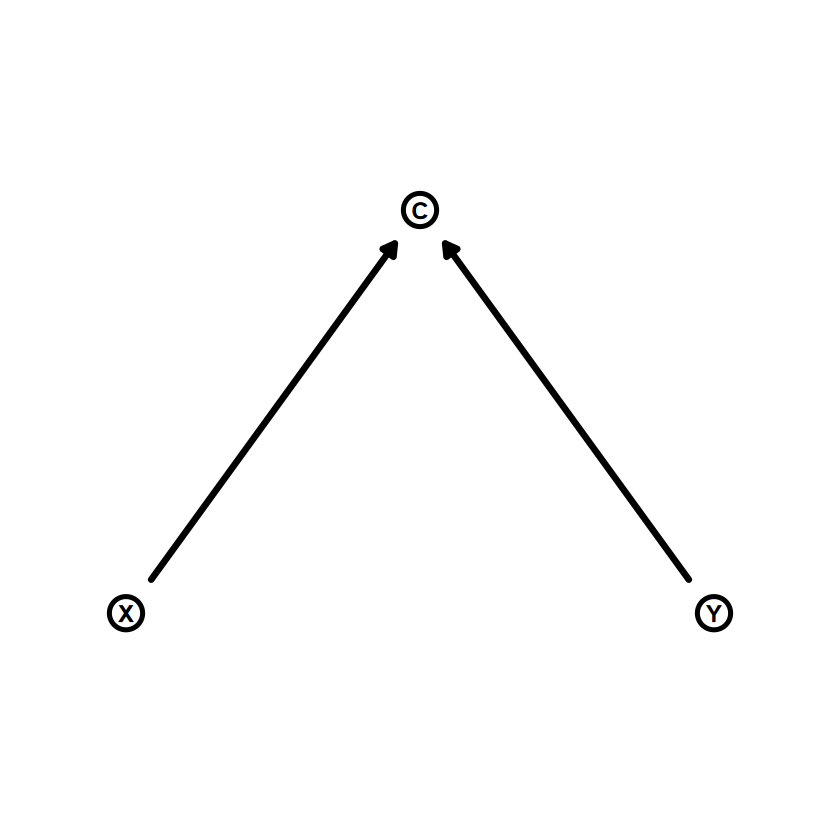

In [9]:
# Collider DAG (X -> C <- Y) con ggplot2, mismo layout/estética

# install.packages(c("ggplot2", "grid"))  # si lo necesitas
library(ggplot2)
library(grid)

# posiciones de los nodos (mismo layout que antes)
nodes <- data.frame(
  x   = c(1.5, 5.0, 8.5),   # X, C, Y
  y   = c(1.2, 6.0, 1.2),
  lab = c("X",  "C",  "Y")
)

# flechas con offsets para no tocar los círculos
# X -> C  y  Y -> C
seg <- data.frame(
  x    = c(1.8, 8.2),   # inicio (cerca de X y Y)
  y    = c(1.6, 1.6),
  xend = c(4.7, 5.3),   # fin (cerca de C)
  yend = c(5.6, 5.6)
)

p <- ggplot() +
  # nodos
  geom_point(data = nodes, aes(x, y),
             shape = 21, fill = "white", color = "black",
             size = 8, stroke = 1.6) +
  geom_text(data = nodes, aes(x, y, label = lab),
            fontface = "bold", size = 5) +

  # flechas X→C y Y→C
  geom_segment(data = seg,
               aes(x = x, y = y, xend = xend, yend = yend),
               arrow = arrow(type = "closed", length = unit(0.28, "cm")),
               linewidth = 1.4, color = "black", lineend = "round") +

  coord_fixed() +
  scale_x_continuous(limits = c(0, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 7),  expand = c(0, 0)) +
  theme_void()

print(p)


3) Mediator — Seguro de salud y salud preventiva
- **X (tratamiento):** Afiliación a seguro de salud público.
- **M (mediador):** Uso de servicios preventivos (controles, vacunas, chequeos).
- **Y (resultado):** Estado de salud / días de incapacidad.
- **Idea:** (X \rightarrow M \rightarrow Y). El seguro reduce barreras de precio y riesgo (**X**), lo que aumenta la prevención (**M**), y eso mejora la salud (**Y**).
  * Sin controlar **M** → **efecto total** de X sobre Y.
  * Controlando **M** → **efecto directo** (lo que no pasa por prevención) y separas el **efecto indirecto** vía **M**.


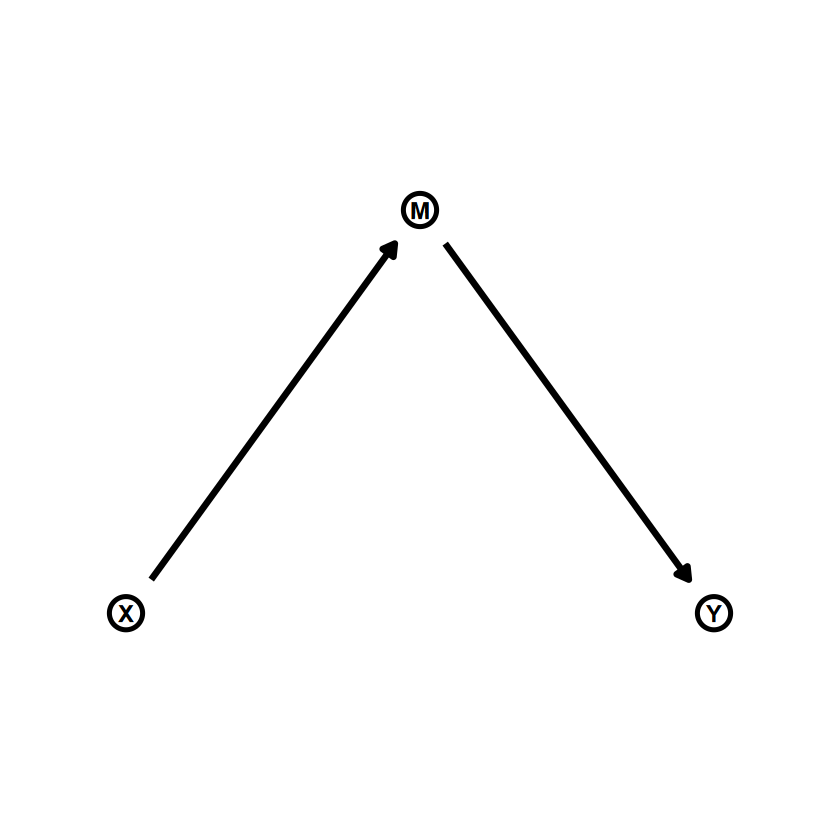

In [ ]:
# install.packages(c("ggplot2", "grid"))  # si lo necesitas
library(ggplot2)
library(grid)

# posiciones de los nodos
nodes <- data.frame(
  x   = c(1.5, 5.0, 8.5),
  y   = c(1.2, 6.0, 1.2),
  lab = c("X",  "M",  "Y")
)

# offsets para que la flecha no invada el círculo
seg <- data.frame(
  x    = c(1.8, 5.3),   # desde (X→M) y (M→Y)
  y    = c(1.6, 5.6),
  xend = c(4.7, 8.2),
  yend = c(5.6, 1.6)
)

p <- ggplot() +
  # nodos (círculos blanco/negro)
  geom_point(data = nodes, aes(x, y),
             shape = 21, fill = "white", color = "black",
             size = 8, stroke = 1.6) +
  geom_text(data = nodes, aes(x, y, label = lab),
            fontface = "bold", size = 5) +

  # flechas X→M y M→Y (negras, con punta cerrada)
  geom_segment(data = seg,
               aes(x = x, y = y, xend = xend, yend = yend),
               arrow = arrow(type = "closed", length = unit(0.28, "cm")),
               linewidth = 1.4, color = "black") +

  # Si quieres también la flecha directa X→Y, descomenta:
  # geom_segment(aes(x = 1.8, y = 1.6, xend = 8.2, yend = 1.6),
  #              arrow = arrow(type = "closed", length = unit(0.28, "cm")),
  #              linewidth = 1.2, color = "black") +

  coord_fixed() +
  scale_x_continuous(limits = c(0, 10), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 7),  expand = c(0, 0)) +
  theme_void()

print(p)





## Part 1b - Simpson's paradox (2 points)

La **Paradoja de Simpson** ocurre cuando los datos agregados muestran una relación entre dos variables que se invierte completamente al separar por grupos por ejemplo podríamos encontrar que hacer más ejercicio se asocia con más colesterol, pero esto sería engañoso porque la edad actúa como factor oculto, las personas mayores hacen menos ejercicio y tienen más colesterol naturalmente mientras que los jóvenes hacen más ejercicio y tienen menos colesterol, al mezclar todas las edades se crea una falsa correlación positiva entre ejercicio y colesterol cuando en realidad dentro de cada grupo de edad la relación es negativa, esto demuestra por qué es peligroso sacar conclusiones de datos sin considerar factores que pueden estar influyendo en ambas variables simultáneamente.


In [7]:
# install.packages("ggplot2")  # si no lo tienes
library(ggplot2)
set.seed(9)

nA <- nB <- 300
slope_within <- 0.6
muA <- 3.5; muB <- 5.6
sdA <- 1.0; sdB <- 1.0
intA <- 7.2; intB <- 4.2
noise_sd <- 0.7

# Grupo A: x más bajo, intercepto alto
x_A <- rnorm(nA, mean = muA, sd = sdA)
y_A <- slope_within * x_A + intA + rnorm(nA, 0, noise_sd)

# Grupo B: x más alto, intercepto bajo
x_B <- rnorm(nB, mean = muB, sd = sdB)
y_B <- slope_within * x_B + intB + rnorm(nB, 0, noise_sd)

df <- data.frame(
  x = c(x_A, x_B),
  y = c(y_A, y_B),
  group = factor(c(rep("A", nA), rep("B", nB)))
)

head(df)


,x,y,group
,<dbl>,<dbl>,<fct>
1,2.733204,9.392954,A
2,2.683542,8.871114,A
3,3.358465,10.528357,A
4,3.222395,8.714284,A
5,3.936307,8.274544,A
6,2.313127,8.075122,A


Slope A:   0.66  (> 0 esperado)


Slope B:   0.60  (> 0 esperado)
Slope ALL: -0.16  (< 0 esperado)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


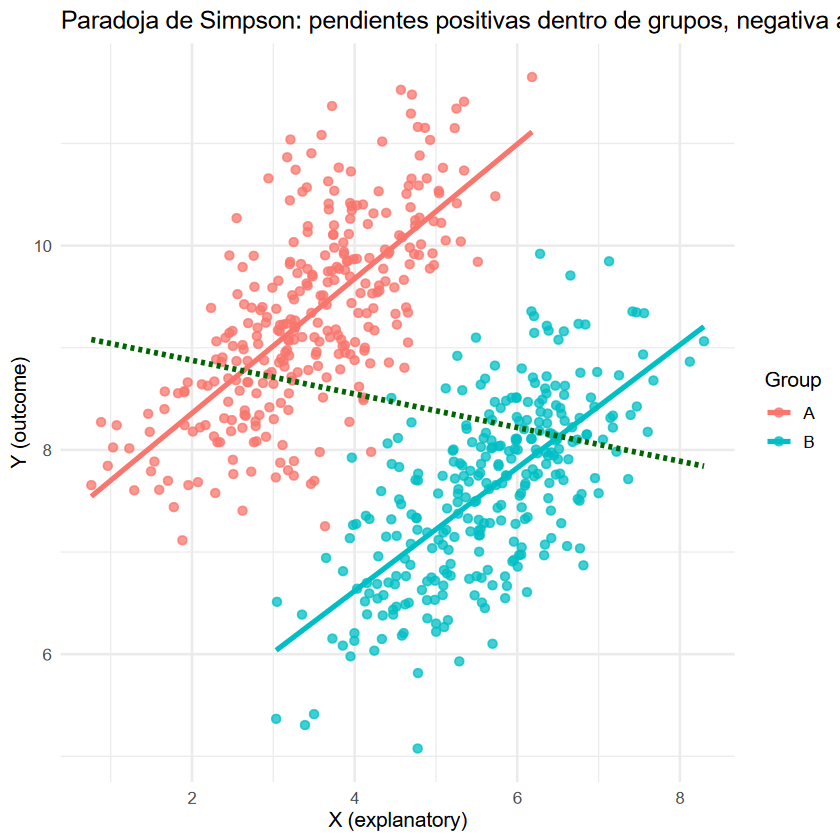

In [8]:
library(ggplot2)

# Ajustes por grupo y pooled (se estiman desde los datos)
lm_A   <- lm(y ~ x, data = subset(df, group == "A"))
lm_B   <- lm(y ~ x, data = subset(df, group == "B"))
lm_all <- lm(y ~ x, data = df)

coef_A   <- coef(lm_A)    # (Intercept), x
coef_B   <- coef(lm_B)
coef_all <- coef(lm_all)

cat(sprintf("Slope A:   %.2f  (> 0 esperado)\n", coef_A["x"]))
cat(sprintf("Slope B:   %.2f  (> 0 esperado)\n", coef_B["x"]))
cat(sprintf("Slope ALL: %.2f  (< 0 esperado)\n", coef_all["x"]))

# Gráfico: puntos + líneas OLS por grupo + línea pooled (discontinua)
p <- ggplot(df, aes(x = x, y = y, color = group)) +
  geom_point(alpha = 0.75, size = 1.8) +
  # líneas OLS para cada grupo (estimadas con lm)
  stat_smooth(method = "lm", se = FALSE, size = 1.1) +
  # línea pooled (sobre todo el conjunto, sin agrupar por color)
  stat_smooth(
    data = df, mapping = aes(x = x, y = y),
    method = "lm", se = FALSE, color = "darkgreen",
    linetype = "dashed", size = 1.2
  ) +
  labs(
    title = "Paradoja de Simpson: pendientes positivas dentro de grupos, negativa al juntar",
    x = "X (explanatory)", y = "Y (outcome)", color = "Group"
  ) +
  theme_minimal(base_size = 12)

print(p)
